# MNIST Handwritten Digits Classification using Stochastic Gradient Descent (SGD)

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn import metrics as ms
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import pickle

## Read the data

In [2]:
mnist_digits = fetch_openml('mnist_784', version=1)


/home/min/anaconda3/envs/data_science/lib/python3.11/site-packages/sklearn/datasets/_openml.py:1022: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [3]:
mnist_digits.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [4]:
x = mnist_digits['data']
y = mnist_digits['target']

In [5]:
x.shape, y.shape

((70000, 784), (70000,))

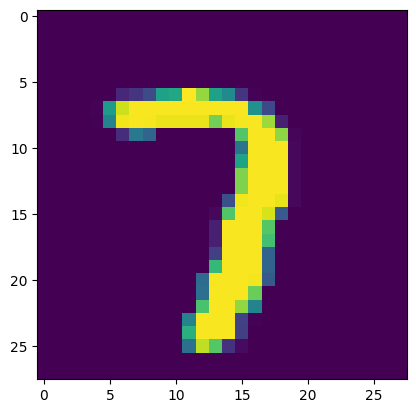

In [6]:
index = np.random.randint(x.shape[0])
example = x.loc[[index]].to_numpy().reshape(28, 28)
plt.imshow(example)

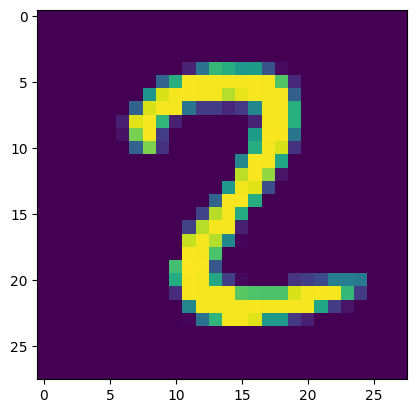

In [7]:
index = np.random.randint(x.shape[0])
example = x.loc[[index]].to_numpy().reshape(28, 28)
plt.imshow(example)

## Split dataset

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

## Train the model

In [9]:
model = SGDClassifier(random_state=8964)
model.fit(X_train, y_train)

SGDClassifier(random_state=8964)

## Evaluate the model

In [10]:
from sklearn.metrics import accuracy_score
predictions = model.predict(X_test)
accuracy = accuracy_score(y_pred=y_test, y_true=predictions)


In [11]:
scores = cross_val_score(model, X_test, y_test, cv=5)
scores

array([0.86809524, 0.87809524, 0.87333333, 0.88333333, 0.8797619 ])

<Axes: >

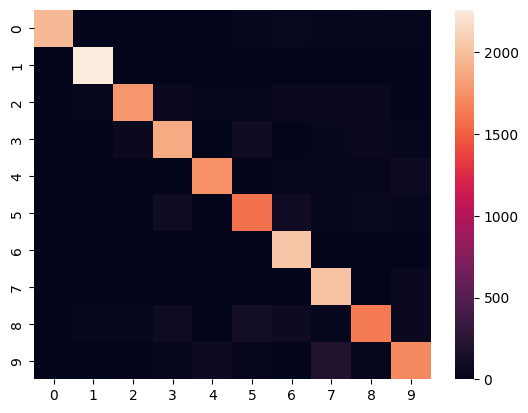

In [12]:
cm = confusion_matrix(y_pred=predictions, y_true=y_test)
sns.heatmap(cm, annot=False)